# Лекция 2. Сравнения групп

## Содержание
[2.1 T-распределение](#2.1)  
[2.2 Сравнение двух средних; t-критерий Стьюдента](#2.2)  
[2.3 Проверка распределения на нормальность, QQ-Plot](#2.3)  
[2.4 Однофакторный дисперсионный анализ](#2.4)  
[2.5 Множественные сравнения в ANOVA](#2.5)  
[2.6 Многофакторный ANOVA](#2.6)  
[2.7 АБ тесты и статистика](#2.7)

## 2.1 T-распределение<a id='2.1'></a>

### Основные определения и тезисы:

**Степень свободы(degrees of freedom - df)** - количество значений, используемых при вычислении переменной.  
*Например, есть 50 независимых значений, и необходимо вычислить одну-единственную статистику "среднее". Согласно формуле, степеней свободы будет 50 - 1 = 49*.

Формула отклонения **среднего выборки(x_mean)** от **среднего ГС(M)** в единицах **стандартной ошибки среднего(se)**:
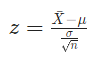  
z имеет стандартное нормальное распределение со средним = 0 и стандартным отклонением = 1.  

На практике почти никогда не известно **стандартное отклонение ГС (σ)**, и для расчета стандартной ошибки используется выборочное **стандартное отклонение(sd)**. В таком случае распределение отклонения x_mean от M будет описываться при помощи **t-распределения**:  
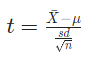

**Распределение Стьюдента (t-distribution)** - представляет собой сумму нескольких нормально распределенных случайных величин. Чем больше величин, тем больше верятность, что их сумма будет иметь нормальное распределение.  
* С увеличением степеней свободы (**df = n - 1**) форма распределения стремится к нормальной;  
* t-распределение унимодально и симметрично, но наблюдения с большей вероятностью попадают за пределы +- **2σ** от **M**.   
 
**Применение t-распределения:**  

Первая выборка - это выборка из пациентов, которые не принимали новое лекарство.  
А вторая выборка - из пациентов, которые его принимали.  
Таким образом, если сравнивать две выборки по t-критерию:
* нулевая гипотеза - лекарство не работает, выборки принадлежат одной ГС;
* альтернативная гипотеза - лекарство работает, выборки принадлежат разным ГС.

### Примеры:

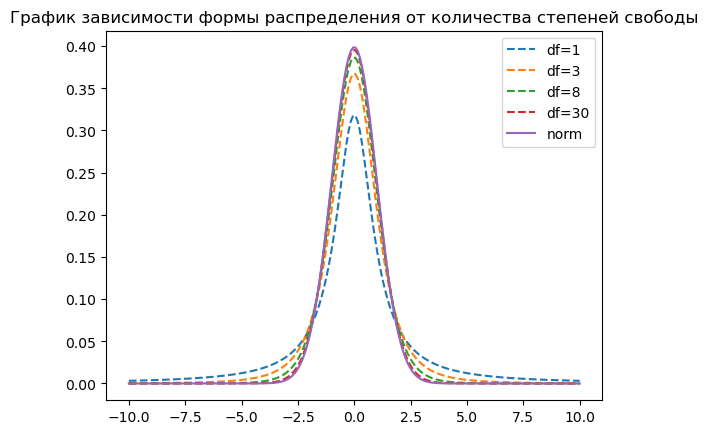

In [47]:
"""Зависимость формы распределения при увеличении количества степеней свободы."""
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10, 10, 200)
# Чем больше степеней свободы, тем ближе распределение к нормальному
y1 = stats.t.pdf(x, df = 1)  # 2 наблюдения
y2 = stats.t.pdf(x, df = 3)  # 4 наблюдения
y3 = stats.t.pdf(x, df = 8)  # 9 наблюдений
y4 = stats.t.pdf(x, df = 30) # 31 наблюдение
y5 = stats.norm.pdf(x)       # нормальное распределение

plt.title('График зависимости формы распределения от количества степеней свободы')
plt.plot(x, y1, '--')
plt.plot(x, y2, '--')
plt.plot(x, y3, '--')
plt.plot(x, y4, '--')
plt.plot(x, y5)
plt.legend(('df=1', 'df=3', 'df=8', 'df=30', 'norm'))
plt.show()

In [48]:
"""Работа с нормальным распределением - отклоняется H0"""
from scipy import stats

M = 10            # Среднее ГС
x_mean = 10.8     # среднее выборки
sd = 2            # стандартное отклонение
N = 25            # кол-во наблюдений

# стандартное отклонение распределения в соответствии с ЦПТ
se = sd / N**0.5  # se = 0.4

# рассчет насколько x_mean отклонилось от M в единицах стандартного отклонения
z = (x_mean - M) / se # z = 2 - Отклонение на 2 вправо

# рассчет p-уровня значимости
# stats.norm.cdf рассчитывает площадь под нормального распределения до значения z.
p = 2*(1-stats.norm.cdf(z)) # p = 0.455...
# в таком случае можно отклонить H0 т.к. p < 0,05
print("Вероятность получить z=2 в обе стороны(p) =", round(p*100, 2), "%")
if p < 0.05:
    print('p =', p, ', отклоняем нулевую гипотезу , т.к. p < 0,05')
else:
    print('p =', p, ', принимаем нулевую гипотезу, т.к. p > 0,05')

Вероятность получить z=2 в обе стороны(p) = 4.55 %
p = 0.045500263896358195 , отклоняем нулевую гипотезу , т.к. p < 0,05


In [49]:
"""Та же выборка, работа с t-распределением - H0 не отклоняется"""
from scipy import stats

M = 10            # Среднее ГС
x_mean = 10.8     # среднее выборки
sd = 2            # стандартное отклонение
N = 25            # кол-во наблюдений
df = N - 1        # степень свободы

# se = sd / (df)**0.5  # se = 0.4

# рассчет насколько x_mean отклонилось от M в единицах стандартного отклонения
t = 2 # предполагается, что t = я из шага выше.

# рассчет p-уровня значимости
# stats.t.cdf рассчитывает площадь под кривой t-распределения до значения t.
p = 2*(1-stats.t.cdf(t, df)) # p = 0.569...
# в этом случае отклонить H0 уже нельзя т.к. p > 0,05
print("Вероятность получить z=2 в обе стороны(p) =", round(p*100, 2), "%")
if p < 0.05:
    print('p =', p, ', отклоняем нулевую гипотезу , т.к. p < 0,05')
else:
    print('p =', p, ', нулевую гипотезу отклонить нельзя, т.к. p > 0,05')

Вероятность получить z=2 в обе стороны(p) = 5.69 %
p = 0.056939849936591624 , нулевую гипотезу отклонить нельзя, т.к. p > 0,05


In [50]:
"""Если на выборке в 15 наблюдений при помощи одновыборочного t-теста проверяется нулевая гипотеза: M = 10.
   и рассчитанное t-значение равняется -2 (t = -2), то p-уровень значимости  (двусторонний) равен:"""
from scipy import stats

t = -2
N = 15
df = 15 - 1

p = 2*(1-stats.t.cdf(abs(t), df))
print(f'p = {p:.3f}')

p = 0.065


## 2.2 Сравнение двух средних; t-критерий Стьюдента<a id='2.2'></a>

### Основные определения и тезисы:

**t-критерий Стьюдента (парный t-test)** - общее название для статистических тестов, в которых статистика критерия имеет распределение Стьюдента. Наиболее часто t-критерии применяются для проверки равенства **средних значений двух выборок(x_mean)**.  Для применения данного критерия необходимо, чтобы исходные данные имели нормальное распределение.  
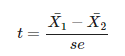  
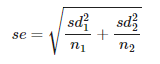  
*df = N_1 + N_2 - 2*  

### Примеры:

In [51]:
'''Пошаговое сравнение двух выборочных средних'''
from scipy import stats
import numpy as np

# 2 выборки наблюдений
sample_1 = [84.7, 105, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4 , 93, 119.3,
            99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114, 95.1, 115.5, 111.5]
sample_2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102,
            69, 79.6, 68.9, 98.6, 76, 74.8, 56, 55.6, 69.4, 59.5]

# размер выборок
N_1 = len(sample_1)
N_2 = len(sample_2)
print("N_1 =", N_1)
print("N_2 =", N_2, "\n")

# среднее выборок
x_mean_1 = sum(sample_1) / N_1
x_mean_2 = sum(sample_2) / N_2
print("x_mean_1 =", x_mean_1)
print("x_mean_2 =", x_mean_2, "\n")

# дисперсия
m_deviation_1 = 0    
for i in sample_1:
    m_deviation_1 += (i - x_mean_1)**2
D_1 = m_deviation_1 / (N_1-1)

m_deviation_2 = 0    
for j in sample_2:
    m_deviation_2 += (j - x_mean_2)**2
D_2 = m_deviation_2 / (N_2-1)

# стандартное отклонение
sd_1 = D_1**0.5
sd_2 = D_2**0.5

print("sd_1 =", sd_1)
print("sd_2 =", sd_2, "\n")

# H0 - M1=M2
# H1 - M1≠M2

# стандартная ошибка среднего
se = ((sd_1**2 / N_1) + (sd_2**2 / N_2))**0.5
print("se =", se)
# t-критерий
t = (x_mean_1 - x_mean_2) / se
print("t-criteria =", t, "\n")
# степень свободы
df = N_1 + N_2 - 2
# вероятность отлонения превышающего t в обе стороны
p = 2*(1-stats.t.cdf(abs(t), df))

if p < 0.05:
    print('p =', p, ', отклоняем нулевую гипотезу. Выборки значимо различаются между собой т.к. p < 0,05')
else:
    print('p =', p, ', нулевую гипотезу отклонить нельзя, т.к. p > 0,05')

N_1 = 20
N_2 = 20 

x_mean_1 = 100.815
x_mean_2 = 75.735 

sd_1 = 10.246502612573408
sd_2 = 15.458102116774606 

se = 4.146949100496082
t-criteria = 6.047819587898917 

p = 4.894702898550207e-07 , отклоняем нулевую гипотезу. Выборки значимо различаются между собой т.к. p < 0,05


In [52]:
"""Визуализация с помощью pandas и matplotlib"""
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
import numpy as np

# подготовка Dataframe
sample_1 = np.array([84.7, 105, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4 , 93, 119.3,
                     99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114, 95.1, 115.5, 111.5])
sample_2 = np.array([57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102,
                     69, 79.6, 68.9, 98.6, 76, 74.8, 56, 55.6, 69.4, 59.5])

data = pd.DataFrame({'sample_1':sample_1, 'sample_2':sample_2}).agg(['count','mean','std','sem']).transpose().\
                        rename(columns={'count':'N','mean':'x_mean','std':'sd','sem':'se'})

# расчет 95% интервала отклонения среднего
K = stats.t.ppf((1 + 0.95)/2, data['x_mean']-1)
data['interval'] = K * data['se']
data

,N,x_mean,sd,se,interval
sample_1,20.0,100.815,10.246503,2.291188,4.545754
sample_2,20.0,75.735,15.458102,3.456537,6.886174


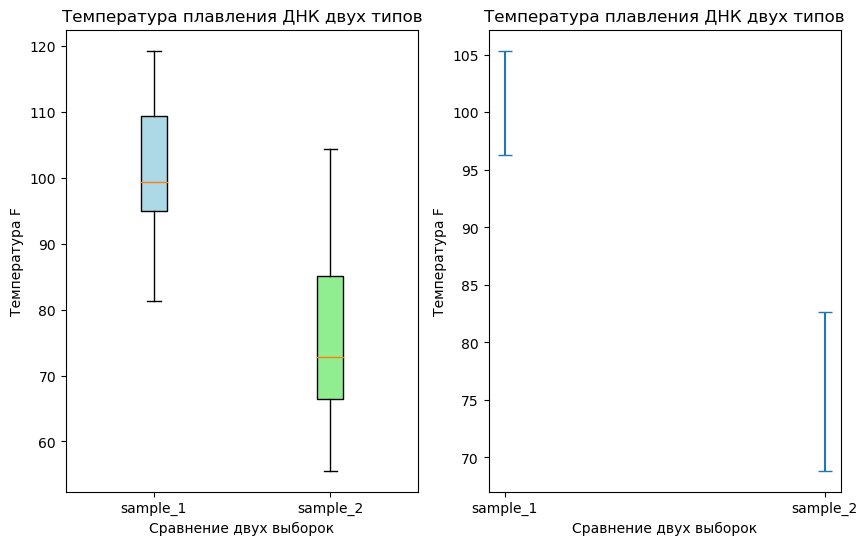

In [53]:
"""Построение графика"""
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
samples = [sample_1, sample_2]

# боксплот
bp = ax1.boxplot(samples, patch_artist = True) 

colors = ['lightblue', 'lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
ax1.set_xticklabels(['sample_1', 'sample_2']) 
    
    
# график доверительных интервалов
eb = ax2.errorbar(x=data.index, y=data['x_mean'], yerr=data['interval'], capsize=5, fmt = 'none')

for ax in [ax1, ax2]:   
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')


plt.show(bp)

**Пример интерпритации доверительных интервалов:**  
Ваш друг Ярослав изучает статистику и недавно прочитал статью, в которой исследовались различия между средними значениями числа рибосом двух различных типов бактерий. Ярослав просит Вас объяснить ему, что означает высказывание: "95% доверительный интервал для разности между средними значениями рибосом двух типов бактерий M_type_1 - M_type_2 оказался равен от 100 до 300”.  


In [54]:
"""Знание t-распределения поможет нам корректно рассчитать границы доверительного интервала,
   особенно в тех случаях, если число наблюдений меньше 30. Ранее при расчете 95% доверительного интервала
   мы использовали формулу x_mean +- 1.96 * (sd/N**0.5).
   Рассчитайте доверительный интервал основываясь на знании t - распределения
   для среднего значения температуры плавления ДНК у первого вида:
   x_mean = 89.9, sd = 11.3, N = 20.
   Для этого определите, в каком диапазоне находится 95 % наблюдений у соответствующего
   t - распределения (df = N - 1) и используйте это значение вместо коэффициента 1,96."""

x_mean = 89.9 # Выборочное среднее
sd = 11.3     # Выборочное стандартное отклонение
N = 20        # Количество наблюдений
df = N-1      # Количество степеней свободы

se = sd / N**0.5 # Стандартная ошибка = 2.52...
K = stats.t.ppf(1-0.025, df) # Доверительный интервал

x_min = x_mean - K * se
x_max = x_mean + K * se
print('Приблизительно 95% всех наблюдений находится в диапазоне ', [x_min, x_max])

Приблизительно 95% всех наблюдений находится в диапазоне  [84.61143720745503, 95.18856279254499]


In [55]:
"""Первые премии Оскар за лучшую мужскую и женскую роль были вручены в 1929.
   Данные гистограммы демонстрируют распределение возраста победителей с 1929 по
   2014 год (100 мужчин, 100 женщин). Используя t - критерий проверьте, можно ли считать
наблюдаемые различия в возрасте между лучшими актрисами и актерами  статистически достоверными.

Средний возраст мужчин равен 45, sd = 9.
Средний возраст женщин равен 34, sd = 10."""

x_mean_m = 45
x_mean_w = 34

N_m = 100
N_w = 100

sd_m = 9
sd_w = 10

# H0 - M1=M2
# H1 - M1≠M2

se = ((sd_m**2 / N_m) + (sd_w**2 / N_w))**0.5

t = (x_mean_m - x_mean_w) / se

df = N_m + N_w - 2

p = 2*(1-stats.t.cdf(abs(t), df))

if p < 0.05:
    print('p =', p, ', отклоняем нулевую гипотезу о равенстве средних т.к. p < 0,05')
else:
    print('p =', p, ', нулевую гипотезу отклонить нельзя, т.к. p > 0,05')


p = 3.441691376337985e-14 , отклоняем нулевую гипотезу о равенстве средних т.к. p < 0,05


In [56]:
"""Решение с помощью scipy"""
from scipy import stats
stats.ttest_ind_from_stats(45, 9, 100, 34, 10, 100) # mean1, std1, nobs1, mean2, std2, nobs2

if p < 0.05:
    print('p =', p, ', отклоняем нулевую гипотезу о равенстве средних т.к. p < 0,05')
else:
    print('p =', p, ', нулевую гипотезу отклонить нельзя, т.к. p > 0,05')

p = 3.441691376337985e-14 , отклоняем нулевую гипотезу о равенстве средних т.к. p < 0,05


## 2.3 Проверка распределения на нормальность, QQ-Plot<a id='2.3'></a>

### Основные определения:
**Гистограмма частот** с наложенным поверх **z-распределением** - наглядно показывает отклонение выборочных значений от нормального распределения.

**QQ-plot** - показывает насколько выборочные значения соответствуют, предсказанным значанием идеально нормального распределения. Пока точки на прямой - идеальное соответствие с нормальным распределением. Если над или под прямой, то значения слишком большие/маленькие соответственно.  
Удобно использовать, когда не очень много наблюдений.

**Тест Колмагорова-Смирнова**  
**Тест Шапиро-Уилка**

**Выбросы** - слишком высокие или слишком низкие значения в выборке. Могут оказать значительное влияяние на результаты t-теста.

**U-критерий Манна-Уитни** - используется для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно. Позволяет выявлять различия в значении параметра между малыми выборками. Переводит измерения в ранговую шкалу.
Не так чувствителен к выбросам как t-тест.

### Примеры:

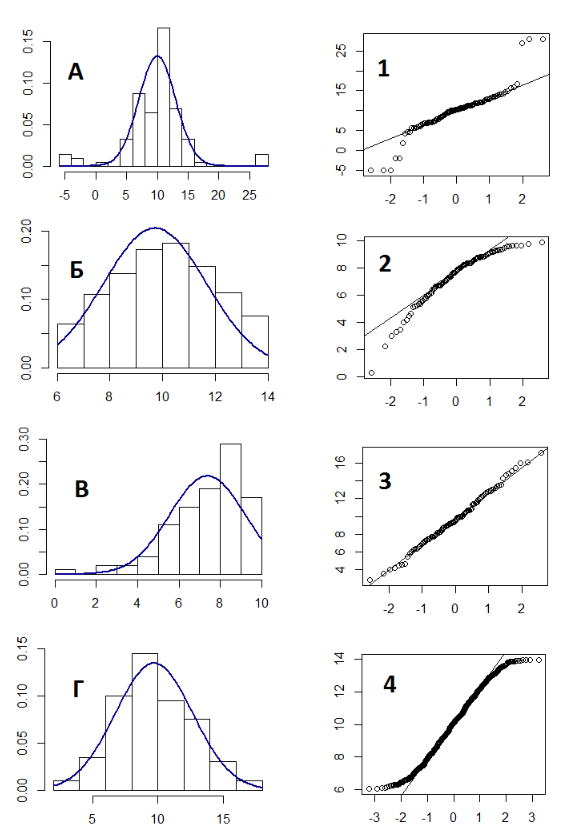  
**А** - 1  
**Б** - 4  
**В** - 2  
**Г** - 3  

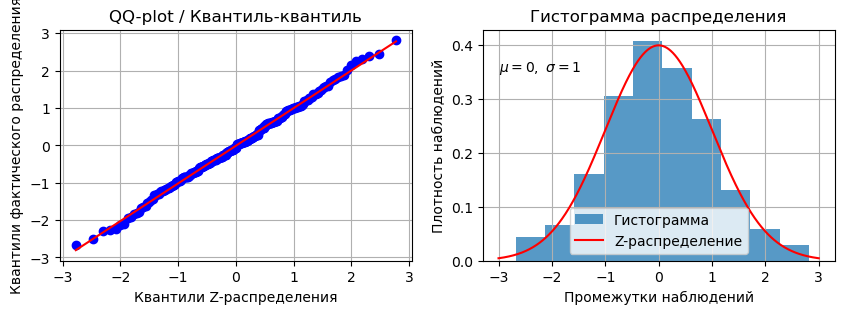

In [57]:
"""Пример построения гистограммы частот и QQ-plot"""
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# генерация нормального распределения 
M = 0  
sd = 1   
N = 250 
sample = np.random.normal(loc=M, scale=sd, size=N)  

# график QQ-plot
plt.figure(figsize = [5*2, 3])
plt.subplot(1, 2, 1)

# создание графика QQ-plot при помощи функции по поиску квантелей значений нашего распределения
stats.probplot(sample, dist="norm", plot=plt)  

plt.title('QQ-plot / Квантиль-квантиль') 
plt.xlabel('Квантили Z-распределения')  
plt.ylabel('Квантили фактического распределения') 
plt.grid(True)

# Гистограмма
plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(sample, 10, density=True, alpha=0.75, label='Гистограмма')

plt.title('Гистограмма распределения')  
plt.xlabel('Промежутки наблюдений')  
plt.ylabel('Плотность наблюдений')  
plt.text(-3, 0.35, r'$\mu=0,\ \sigma=1$') 
plt.grid(True) 

# график z-распределения поверх гистограммы
x = np.linspace(M - 3*sd, M + 3*sd, 1000)

plt.plot(x, stats.norm.pdf(x, M, sd), color='red', label='Z-распределение') 


plt.legend()  

plt.show() 

## 2.4 Однофакторный дисперсионный анализ<a id='2.4'></a>

### Основные тезисы и определения:
**Дисперсионный анализ (Analysis of Variance, ANOVA)** - используется когда необходимо сравнить **несколько** групп между собой(рассмотренный ранее t-критерий Стьюдента предназначен для сравнения только двух совокупностей). Предполагается, что вся изменчивость данных может быть обусловленна 2 показателями:
1) межгрупповым средним квадратом (MSb = SSB/SSB_df);
2) внутригрупповоым средним квадратом (MSw = SSW/SSW_df).  

Если межгрупповой показатель значительно превышает внутригрупповой, то весьма вероятно, что как минимум 2 группы(2 средних значения) значимо отличаются друг от друга. Для того чтобы узнать насколько это вероятно, с помощью **F-значения**, рассчитывается **п-уровень значимости (p)**.  
Анализ называется **однофакторным**, если в качестве **независимой переменной** используется только один фактор.

**Общая сумма квадратов (sum of squares total - SST)** - характеризует насколько высока изменчивость данных без учета разделения их на группы. SST деленная на число всех наблюдений минус один (SST/SST_df) - это дисперсия, расчитанная для всех наблюдений без учета деления на группы.  
SST состоит из двух источников (SST = SSB + SSW):
* **Межгрупповая сумма квадратов (SSB)**  - насколько вариативны группы между собой;
* **Внутригрупповая сумма квадратов (SSW)** - насколько вариативны значения группы.  
Чем больше дисперсия внутри групп, тем больше значение внутригруппового квадрата (при неизменном количестве наблюдений).  

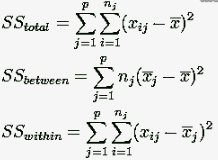

**F-значение** - основной статистический показатель дисперсионного анализа. Представляет собой отношение межгрупповой изменчивости к внутригрупповой (F = MSb/MSw).
* Чем больше группы схожи, тем меньше F-значение;
* Всегда принимает положительные значения (вероятность отклонения рассчитывается только вправо);
* Не является нормальным, подчиняется распределению Фишера (F distribution).  
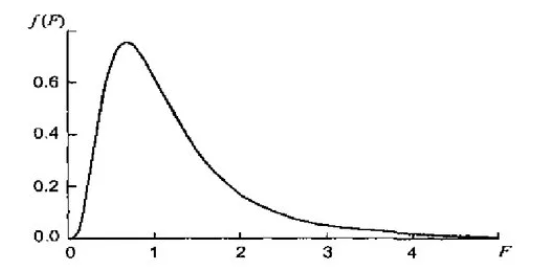  


**Независимая переменная** - разделяет наблюдения на группы(номинативная переменная с несколькими градациями).  
**Зависимая переменная** - количественная переменная, по степени выраженности которой сравниваются группы.

*Например: Есть 3 типа лечения, необходимо понять, есть ли между ними разница. Здесь независимая переменная - тип лечения(тип1, тип2, тип3). Зависимая переменная - некая величина, у каждого испытуемого, которая покажет насколько успешно было лечение(продолжительность  симптомов, средняя температура в течении недели после лечения, уровень вещества в крови и т.д.)*

### Примеры:

In [35]:
"""Однофакторный дисперсионный анализ"""
from scipy import stats
import pandas as pd

data = pd.DataFrame({'1': [3, 1, 2],
                   '2': [5, 3, 4],
                   '3': [7, 6, 5]})

# H0 - M1=M2=M3
# H1 - M1≠M2 или M2≠M3 или M1≠M3 (хотя бы пара средних не равны)

N = data.count(axis=1).sum() # количество всех элементов = 9
m = data.shape[1] # количество групп = 3
tot_mean = data.values.flatten().mean() # среднее значение по всем элементам = 4

# общая сумма квадратов = 30
SST = 0
for column in range(data.shape[1]):
    for row in range(data.shape[0]):
        SST += (data.iloc[row,column] - tot_mean)**2

# степени свободы общей суммы квадратов (число независимых элементов при рассчете показателя) = 9
# "забывается" один из элементов
# число всех элементов - 1 (можно найти "забытый" элемент зная SST и все остальные элементы)
SST_df = N-1

# межгрупповая сумма квадратов = 24
SSB = 0
for column in range(data.shape[1]):
    group_mean = data.iloc[:,column].mean() # среднее группы
    n = data.iloc[:,column].count() # количество элементов в группе
    SSB += n*(group_mean - tot_mean)**2

# степени свободы межгрупповой суммы квадратов = 2 
# "забывается" среднее значение одной из групп
# число средних значений групп - 1 (можно найти "забытое" среднее значение зная SSB и 2 оставшихся групповых средних)
SSB_df = m-1

# внутригрупповая сумма квадратов = 6
SSW = 0
for column in range(data.shape[1]):
    group_mean = data.iloc[:,column].mean() # среднее группы
    for row in range(data.shape[0]):
        SSW += (data.iloc[row,column] - group_mean)**2

# степени свободы внутригрупповой суммы квадратов = 6
# забывается один из элементов в каждой группе
# число всех элементов - число средних значений групп (можно найти "забытые" элементы групп зная SSW и средние этих групп)
SSW_df = N-m

# SST = SSW+SSB (SST = 30; SSB = 24; SSW = 6)
# Если большая часть SST состоит из SSB (SSB > SSW) - группы значительно различаются между собой
# Если большая часть SST состоит из SSW (SSW > SSB) - группы не различаются, но имеется высокая внутригрупповая изменчивость

# меж и внутри групповые средние квадраты
MSb = SSB/SSB_df
MSw = SSW/SSW_df

# f-значение = 12
# Чем больше группы схожи, тем меньше F-значение
f_value = MSb / MSw

# p = 0.008...
p = stats.f.sf(f_value, SSB_df, SSW_df)
print("p < 0.05, отклоняем нулевую гипотезу.")

p < 0.05, отклоняем нулевую гипотезу.


In [59]:
"""Допустим, что при сравнении четырех групп между собой (по 5 наблюдений в каждой группе) получено F = 3.5, тогда:"""
m = 4
N = 4*5
f_value = 3.5

SSB_df = m-1
SSW_df = N-m
p = stats.f.sf(f_value, SSB_df, SSW_df)


if p < 0.05:
    print('p =', p, ', отклоняем нулевую гипотезу о равенстве средних, т.к. p < 0,05')
else:
    print('p =', p, ', принимаем нулевую гипотезу о равенстве средних, т.к. p > 0,05')

p = 0.040052541494826094 , отклоняем нулевую гипотезу о равенстве средних, т.к. p < 0,05


### Однофакторный дисперсионый анализ One-way ANOVA

In [45]:
"""Генотерапия позволяет корректировать работу дефективного гена, ответственного за развитие заболевания.
   В эксперименте сравнивалась эффективность четырех различных видов терапии. Результаты исследования
   представлены в таблице 'genetherapy.csv'."""

URL = 'https://stepik.org/media/attachments/lesson/8083/genetherapy.csv'
data = pd.read_csv(URL)

# Независимая переменная - 4 вида терапии (Therapy)
# Зависимая - уровень экспрессии гена (expr)
data.head(3)

,expr,Therapy
0,100,A
1,96,A
2,101,A


In [39]:
"""Подготовка df"""
data_pivoted = data.copy()
data_pivoted = data.pivot(index = None, columns='Therapy', values='expr')

rows = 0
for column in data_pivoted.columns:
    data_pivoted[column] = data_pivoted[column].shift(rows)
    rows -= 15
data_pivoted.dropna(inplace=True)
data_pivoted

Therapy,A,B,C,D
0,100.0,100.0,91.0,92.0
1,96.0,100.0,96.0,85.0
2,101.0,95.0,94.0,95.0
3,95.0,84.0,96.0,89.0
4,103.0,101.0,91.0,91.0
5,99.0,101.0,85.0,91.0
6,97.0,95.0,98.0,99.0
7,96.0,106.0,93.0,94.0
8,98.0,105.0,100.0,97.0
9,106.0,97.0,85.0,94.0


In [43]:
"""Вычисление p-value и вывод"""
# H0 - M1=M2=M3=M4
# H1 - M1≠M2≠M3≠M4 (хотя бы пара средних не равны)

# общее количество наблюдений
N = data_pivoted.count(axis=1).sum()
print("N =", N)
# количество групп
m = data_pivoted.shape[1]
print("m =", m)
# среднее значение по всем наблюдениям
tot_mean = data_pivoted.values.flatten().mean()
print("tot_mean =", tot_mean)

# Межгрупповая сумма квадратов и степень свободы
SSB = 0
for column in range(data_pivoted.shape[1]):
    group_mean = data_pivoted.iloc[:,column].mean() # среднее группы
    n = data_pivoted.iloc[:,column].count() # количество наблюдений в группе
    SSB += n*(group_mean - tot_mean)**2
print("SSB =", SSB)

SSB_df = m-1
print("SSB_df =", SSB_df)

# Внутригрупповая сумма квадратов и степень свободы
SSW = 0
for column in range(data_pivoted.shape[1]):
    group_mean = data_pivoted.iloc[:,column].mean() # среднее группы
    for row in range(data_pivoted.shape[0]):
        SSW += (data_pivoted.iloc[row,column] - group_mean)**2
print("SSW =", SSW)

SSW_df = N-m
print("SSW_df =", SSW_df)

# межгрупповая и внутригрупповая изменчивости(дисперсии)
MSb = SSB/SSB_df
print("MSb =", MSb)
MSw = SSW/SSW_df
print("MSw =", MSw)

# f-значение
f_value = MSb / MSw
print("f_value =", f_value, "\n")
# p-уровень значимости для F distribution
p = stats.f.sf(f_value, SSB_df, SSW_df)

if p < 0.05:
    print('p =', p, ', отклоняем нулевую гипотезу о равенстве средних, т.к. p < 0,05')
else:
    print('p =', p, ', принимаем нулевую гипотезу о равенстве средних, т.к. p > 0,05')
print('Отклонение нулевой гипотезы позволяет нам сделать следующий вывод - как минимум две группы значимо различаются')

N = 60
m = 4
tot_mean = 96.31666666666666
SSB = 560.7166666666667
SSB_df = 3
SSW = 1302.2666666666667
SSW_df = 56
MSb = 186.90555555555557
MSw = 23.254761904761903
f_value = 8.037302481143989 

p = 0.00015249722895229606 , отклоняем нулевую гипотезу о равенстве средних, т.к. p < 0,05
Отклонение нулевой гипотезы позволяет нам сделать следующий вывод - как минимум две группы значимо различаются


In [41]:
"""Подготовка Dataframe для визуализации"""
data_grouped = data.copy()
data_grouped = data.groupby("Therapy").agg(["count", "mean", "std"]).\
                rename(columns={'count':'N','mean':'mean','std':'sd'})
data_grouped.columns  = data_grouped.columns.map('_'.join)
data_grouped

,expr_N,expr_mean,expr_sd
Therapy,,,
A,15,99.733333,4.165619
B,15,98.800000,5.894307
C,15,94.400000,5.193402
D,15,92.333333,3.735289


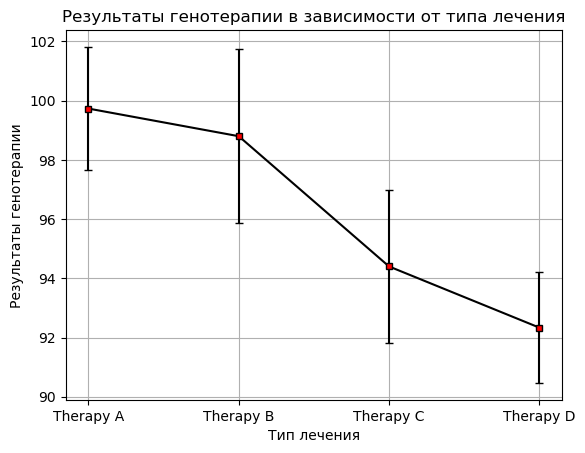

In [42]:
"""Построение графика доверительных интервалов"""
import matplotlib.pyplot as plt

A_mean = data_grouped.loc["A"][1]
B_mean = data_grouped.loc["B"][1]
C_mean = data_grouped.loc["C"][1]
D_mean = data_grouped.loc["D"][1]
A_sd = data_grouped.loc["A"][2]
B_sd = data_grouped.loc["B"][2]
C_sd = data_grouped.loc["C"][2]
D_sd = data_grouped.loc["D"][2]

groups = ['Therapy A', 'Therapy B', 'Therapy C', 'Therapy D']
mean = [A_mean, B_mean, C_mean, D_mean]
sd = [A_sd/2, B_sd/2, C_sd/2, D_sd/2]

plt.errorbar(x=groups, y=mean, yerr=sd, color="black", capsize=3, marker="s", markersize=5, mfc="red", mec="black")
plt.title('Результаты генотерапии в зависимости от типа лечения')
plt.xlabel('Тип лечения')
plt.ylabel('Результаты генотерапии')
plt.grid()
plt.show()

## 2.5 Множественные сравнения в ANOVA<a id='2.5'></a>

### Основные тезисы и определения:  
При выполнении попарного *t-теста*, с многократным увеличением количества выборок, шанс получить хотя бы одно значительное различие между выборками стремится к 100%. В таком случае необходимо корректировать порог **уровня значимости для проверки гипотезы(α)** (поправки на множественное сравнение).  

**Поправка Бонферрони** - относится к процессу корректировки **уровня альфа(α)**  статистических тестов таким образом, чтобы контролировать вероятность совершения ошибки I рода.  
Если необходимо удержать вероятность совершения ошибки I рода на уровне 0.05, то нужно разделить **α** на **количество сравнений, которые нужно будет провести(N_comp)**.  
**α_new = α / N_comp**  
где N_comp - количество сравнений между группами выборок.  

*Например:* сравниваются 8 групп между собой, тогда количество сравнений - 8 * (8-1) / 2 = 28.  α_new = 0.05 / 28 = 0.0017.  

**Почему не любят поправку Бонферрони:** Поправка Бонферрони делает настолько низкий p, при большом количестве сравнений, что получить значимые различия становится очень сложно. В то время как в современной статистике вычисления при большом количестве выборок происходит повсеместно.

**Критерий Тьюки(Tukey HSD)** - представляет собой модифицированный критерий Стьюдента.  
* q = sqrt(2t)  
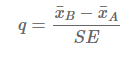  
Отличие заключается в **рассчете стандартной ошибки(se)**:  
Формула расчета se когда все группы содержат одинаковое число наблюдений:  
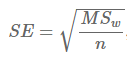  
где MSw - рассчитываемая в ходе дисперсионного анализа внутригрупповая дисперсия.  
Формула расчета se если группы неодинаковы по размеру:  
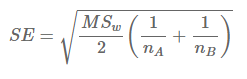  

Критерий Тьюки имеет те же условия применимости, что и дисперсионный анализ, т.е. нормальность распределения данных и однородность групповых дисперсий. Устойчивость к отклонению от этих условий, как и статистическая мощность критерия Тьюки, возрастают при одинаковом числе наблюдений во всех сравниваемых группах.  

### Примеры:

In [13]:
"""Почему нельзя использовать t-критерий для сравнение более чем двух выборок"""
import scipy.stats as stats
from matplotlib import pyplot
import itertools
import numpy as np

# Генеральная совокупность, где признак распределен нормальным образом:
M = 0
D = 1

# Из этой ГС многократно извлекаются выборки по N элементов и сравниваются средние значения между собой

# Сравнение двух выборок с помощью t-теста
def ttest(sample1 , sample2):
    # Стандартная ошибка среднего
    se = np.sqrt(sample1['sd']**2 / sample1['N'] + sample2['sd']**2 / sample2['N'])
    # Степень свободы
    df = sample1['N'] + sample2['N'] - 2
    # t-критерий
    t = (sample1['M'] - sample2['M'])/se
    # p-уровень значимости
    p = stats.t.sf(np.abs(t), df)*2
    return p 



# m - количество выборок
# N - количество элементов в выборке
# a - уровень значимости для проверки гипотезы (отклоняется H0 каждого отдельного теста, если p-value < a)
def false_alarm(m, N, a):
    iterations = 1000 # кол-во раз извлекаются выборки из ГС
    result = {'Да':0, 'Нет':0} # результаты сравнений     
    data = list(range(m)) # инициализация групп с выборками
    
    for i in range(iterations):
        # Заполнение m выборок
        for sample in range(m):
            dt = stats.norm.rvs(loc=M, scale=D, size=N)
            data[sample] = {'sd':np.std(dt, ddof = 1), 'M':np.mean(dt), 'N':N}
        
        # Сравнение выборок попарно к каждой выборке
        for first, second in itertools.combinations(data, 2):
            if ttest(first, second) <= a:
                result['Да'] +=1
                break
        else:
            result['Нет'] +=1

    # Гистограмма частот
    barlist = pyplot.bar(result.keys(), result.values(), color='b')
    barlist[0].set_color('r')
    
    pyplot.title(round(result['Да'] / iterations,3))
    pyplot.ylabel('количество')
    
    pyplot.show()

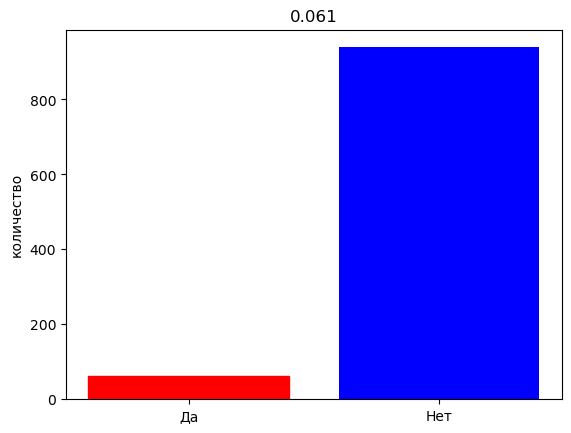

In [22]:
# 1000 раз извлекаются 2 выборки по 30 элементов
# В 5% случаев получены значительные различия между выборками.
m = 2
N = 30
a = 0.05
false_alarm(m, N, a)

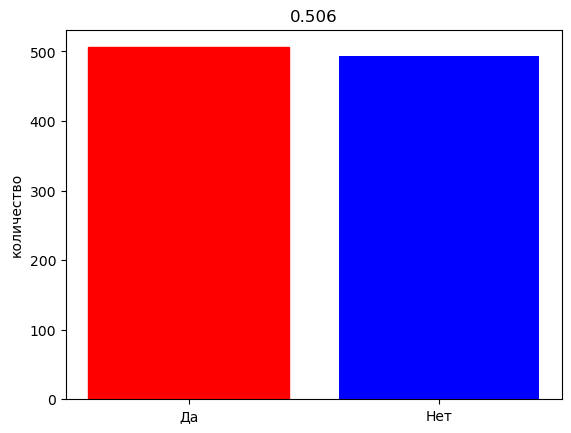

In [23]:
# Увеличиваем кол-во выборок до 8 (сравниваются все возможные комбинации пар - 8*(8-1) / 2 = 28)
# В более чем 50% случаев получено хотя бы одно значительное различие между выборками.
m = 8
N = 30
a = 0.05
false_alarm(m, N, a)

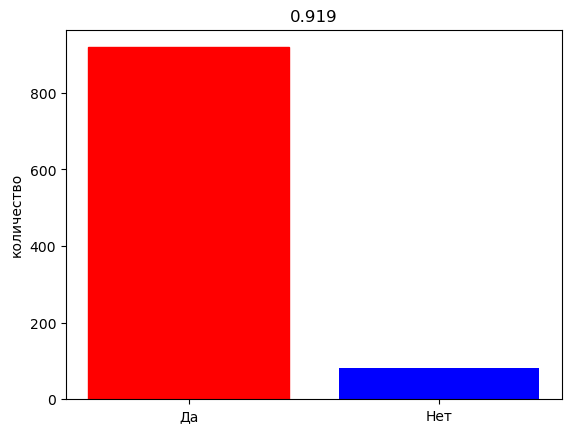

In [24]:
# Увеличиваем кол-во выборок до 20 ( 20*(20-1) / 2 = 190)
# В более чем 90% случаев получено хотя бы одно значительное различие между выборками.
m = 20
N = 30
a = 0.05
false_alarm(m, N, a)

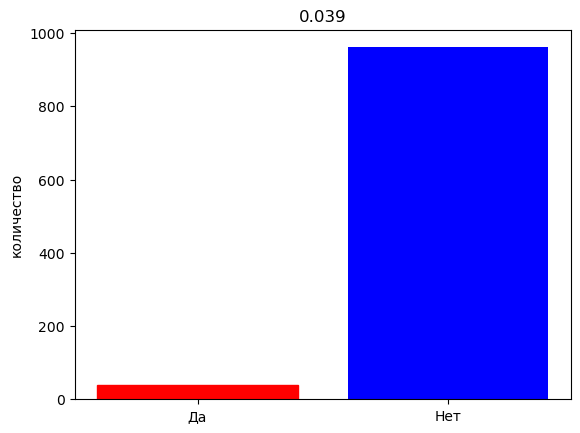

In [33]:
"""Эксперимент с поправкой Бонферрони"""
m = 20
N = 30
a = 0.05

N_comp = m * (m-1) / 2 # количество сравнений между группами выборок = 190.0
a_new = a / N_comp # уровень альфа = 0.00026...

# Только около 4% случаев получают значительные различия между выборками.
false_alarm(m, N, a_new)

In [214]:
"""Расчет критерия Тьюки"""
from scipy import stats
import itertools
import math
import pandas as pd
import numpy as np

URL = 'https://stepik.org/media/attachments/lesson/8083/genetherapy.csv'
data = pd.read_csv(URL)

# Подготовка df
data_pivoted = data.copy()
data_pivoted = data.pivot(index = None, columns='Therapy', values='expr')

rows = 0
for column in data_pivoted.columns:
    data_pivoted[column] = data_pivoted[column].shift(rows)
    rows -= 15
data_pivoted.dropna(inplace=True)


# общее количество наблюдений
N = data_pivoted.count(axis=1).sum() # N = 60
# количество групп
m = data_pivoted.shape[1] # m = 4
# среднее значение по всем наблюдениям
tot_mean = data_pivoted.values.flatten().mean() # tot_mean = 96.31666666666666

# Внутригрупповая сумма квадратов
SSW = 0
for column in range(data_pivoted.shape[1]):
    group_mean = data_pivoted.iloc[:,column].mean() # среднее группы
    for row in range(data_pivoted.shape[0]):
        SSW += (data_pivoted.iloc[row,column] - group_mean)**2 # SSW = 1302.26...

# Cтепень свободы внутригрупповой суммы квадратов
SSW_df = N-m # SSW_df = 56

# внутригрупповая дисперсия
MSw = SSW/SSW_df # MSw = 23.25...
# стандартная ошибка
se = (MSw/(N/m))**0.5 # se = 1.24...

# Формирование групп для сравнения
group_combinations = list(itertools.combinations(data_pivoted.columns, 2))
# [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]

# уровень альфа
a = 0.05

# значение стьюдентизированного диапазона, при котором вероятность получить значение меньше или равное этому равна 1-a
q_crit = stats.studentized_range.ppf(1-a, m, SSW_df)
q_crit

3.7446781868177195

In [258]:
# p-уровень и доверительный интервал
data_comp = pd.DataFrame(columns=[f'{sample1} - {sample2}' for sample1, sample2 in group_combinations], 
                 index=['Средние выборок', 'Разница', 'Нижняя граница', 'Верхняя граница', 'p-уровень', 'q', 'H0'])

# средние групп
sample_means = data_pivoted.describe().iloc[1].to_frame().T

for sample1, sample2 in group_combinations:
    key = f'{sample1} - {sample2}'
    # пара средних двух выборок
    s1_s2_mean = [sample_means[sample1]['mean'], sample_means[sample2]['mean']]
    # для каждой пары средних вычисляется q
    q = (max(s1_s2_mean) - min(s1_s2_mean)) / se
    # разность между групповыми средними
    mean_diff = (s1_s2_mean[1] -s1_s2_mean[0])
    # p-значение
    p = 1-stats.studentized_range.cdf(q, m, SSW_df)
    # доверительный интервал
    int_max = mean_diff + q_crit * se
    int_min = mean_diff - q_crit * se
    # заполнение таблицы значениями
    data_comp[key]['Средние выборок'] = np.round(s1_s2_mean, 2)
    data_comp[key]['Разница'] = mean_diff
    data_comp[key]['p-уровень'] = p
    data_comp[key]['Нижняя граница'] = int_min
    data_comp[key]['Верхняя граница'] = int_max
    data_comp[key]['q'] = q
    # если q > q_crit, то два средних значительно отличаются
    if q > q_crit:
        data_comp[key]['H0'] = 'Отклоняется'
    else:
        data_comp[key]['H0'] = 'Не отклоняется'
        
data_comp.T

,Средние выборок,Разница,Нижняя граница,Верхняя граница,p-уровень,q,H0
A - B,"[99.73, 98.8]",-0.933333,-5.595897,3.729231,0.95142,0.749595,Не отклоняется
A - C,"[99.73, 94.4]",-5.333333,-9.995897,-0.670769,0.018886,4.283398,Отклоняется
A - D,"[99.73, 92.33]",-7.4,-12.062564,-2.737436,0.000542,5.943214,Отклоняется
B - C,"[98.8, 94.4]",-4.4,-9.062564,0.262564,0.071041,3.533803,Не отклоняется
B - D,"[98.8, 92.33]",-6.466667,-11.129231,-1.804103,0.002944,5.19362,Отклоняется
C - D,"[94.4, 92.33]",-2.066667,-6.729231,2.595897,0.645794,1.659817,Не отклоняется


In [260]:
"""Расчет критерия Тьюки с помощью scipy"""
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
data = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')

MultiComp = MultiComparison(data['expr'], data['Therapy'])

MultiComp.tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-0.9333,0.9514,-5.5959,3.7292,False
A,C,-5.3333,0.0189,-9.9959,-0.6708,True
A,D,-7.4,0.0005,-12.0626,-2.7374,True
B,C,-4.4,0.071,-9.0626,0.2626,False
B,D,-6.4667,0.0029,-11.1292,-1.8041,True
C,D,-2.0667,0.6458,-6.7292,2.5959,False


Text(0.5, 1.0, '95% Доверительный интервал')

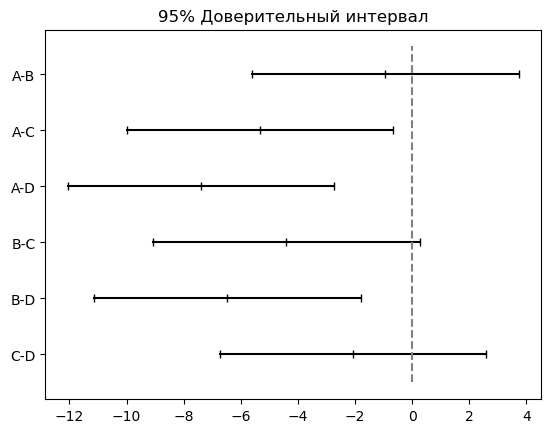

In [277]:
"""Построение 95% доверительного интервала"""
tukey_data = MultiComp.tukeyhsd()._results_table.data
tukey_df = pd.DataFrame(tukey_data[1:], columns=tukey_data[0])

tukey_df['category'] = tukey_df['group1'] + ['-'] + tukey_df['group2']
tukey_df['orderby'] = range(len(tukey_df), 0, -1)

for lower, upper, meandiff, y in zip(tukey_df['lower'], tukey_df['upper'],
                                     tukey_df['meandiff'], tukey_df['orderby']):
    plt.plot((lower, upper),(y, y), '|-', color='black')
    plt.plot(meandiff, y ,'|-', color='black')
    
plt.yticks(tukey_df['orderby'], tukey_df['category'])
plt.vlines(0, tukey_df['orderby'].min() - 0.5, tukey_df['orderby'].max() + 0.5,
           linestyles='dashed', color='gray')
plt.title('95% Доверительный интервал')

In [208]:
"""Чтобы выяснить, как лучше преподавать статистику, преподаватели разбили студентов на пять групп.
   В каждой группе использовалась различная методика преподавания. В конце года каждая группа написала итоговую работу.
   Таким образом, сравнивалось пять групп по среднему баллу контрольной работы. Был применен однофакторный дисперсионный
   анализ, по результатам которого удалось отклонить нулевую гипотезу о равенстве средних. 

   Сколько сравнений необходимо произвести, чтобы попарно сравнить все группы между собой?"""

N = 5

N_comp = N * (N-1) / 2
print(round(N_comp), "сравнений")

10 сравнений


In [278]:
"""Курение считают основным фактором, предрасполагающим к хроническим заболеваниям легких.
   Однако пассивное курение таким фактором обычно не считается. Группа исследователей усомнилась в безвредности
   пассивного курения и исследовали проходимость дыхательных путей у некурящих, пассивных и активных курильщиков.
   В качестве зависимой переменной выступал один из показателей функции внешнего дыхания — максимальная объемная
   скорость середины выдоха. Исследователям удалось отклонить основную нулевую гипотезу о равенстве средних при p<0,05.

   Для попарного сравнения всех групп между собой использовалась поправка Бонферрони.
   И различиям между группами признавались статистически достоверными, если p-уровень значимости """

a = 0.05
N = 3

N_comp = N * (N-1) / 2
a_new = a / N_comp
print('Меньше чем - ', round(a_new, 3))

Меньше чем -  0.017


## 2.6 Многофакторный ANOVA<a id='2.6'></a>

### Основные тезисы и определения:  

**Двухфакторный дисперсионный анализ** - это статистический метод, используемый для анализа данных, которые имеют **два фактора**, которые могут влиять на зависимую переменную. Данный метод позволяет определить, как каждый из двух факторов влияет на зависимую переменную, а также как взаимодействие между двумя факторами может влиять на зависимую переменную.  

Основная идея сводится к тому, что **общая изменчивость(SStotal)** состоит из суммы четырех компонентов: внутригрупповая изменчивость(SSW), изменчивость под влиянием фактора A(SSBa), изменчивость под влиянием фактора B(SSBb) и изменчивость, обусловленная взаимодействием этих двух факторов(SSBa * SSBb).  
**SStotal = SSW + SSBa + SSBb + SSBa * SSBb**  

*Например: в экономике двухфакторный дисперсионный анализ может использоваться для определения, как два фактора, такие как цена и рекламный бюджет, влияют на продажи определенного товара.*  

**Взаимодействие факторов** - ознчает, что влияние одного фактора по-разному проявляется на зависимую переменную в зависимости от градаций другого фактора.  

**Причиной отклонения H0** в многофакторном дисперсионном анализе могут быть:  
* Значимый эффект для всех факторов;  
* Значимый эффект одного из фактора;  
* Значимое взаимодействие факторов.

**Требования к данным** в дисперсионном анализе:  
1) Нормальность распределения зависимой переменной в каждой из групп;  
2) Гомогенность дисперсии (примерно одинаковая дисперсия в каждой из групп).  

Чем больше наблюдений (N>50), тем более устойчива ANOVA к нарушениям этих требований.
Нормальность можно проверить с помощью QQ-plot, наличие выбросов с помощью box-plot, гомогенность с помощью Levene's Test.

**Примеры:**

In [285]:
"""Атеросклероз довольно опасное заболевание - причина ишемической болезни сердца и инсультов.
   Анализ экспрессии генов лейкоцитов позволяет предсказать вероятность развития данного заболевания.
   В эксперименте исследовался уровень экспрессии в зависимости от возраста пациентов и дозировки лекарства аторвастатина."""

import pandas as pd
from scipy import stats

URL = 'https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv'

atherosclerosis_data = pd.read_csv(URL, header=0, sep=',')
atherosclerosis_data.head()

,expr,age,dose
0,107.351478,1,D1
1,104.504438,1,D1
2,103.435134,1,D1
3,109.572882,1,D1
4,114.993803,1,D1


In [358]:
"""Многофакторный ANOVA"""
# количество наблюдений
N =  len(atherosclerosis_data.expr)
# количество групп по фактору a (молодые / пожилые)
m_a = len(atherosclerosis_data.age.unique())
# количество групп по фактору б (D1 / D2)
m_b = len(atherosclerosis_data.dose.unique())

# степени свободы
df_a = m_a - 1 # = 1
df_b = m_b - 1 # = 1
df_ab = df_a * df_b # = 1
df_w = N - m_a * m_b # = 60

# среднее значение по всем наблюдениям
tot_mean = atherosclerosis_data['expr'].mean() # 103.39...

# суммы квадратов
# группа а = 197.45...
SSB_a = sum([(atherosclerosis_data[atherosclerosis_data.age == i].expr.mean()
              - tot_mean)**2 for i in atherosclerosis_data.age])

# группа б = 16.91...
SSB_b = sum([(atherosclerosis_data[atherosclerosis_data.dose == i].expr.mean() 
              - tot_mean)**2 for i in atherosclerosis_data.dose])

# общая = 1805.54...
SStotal = sum((atherosclerosis_data.expr - tot_mean)**2)

# внутригрупповая = 1590.25...
split_age = [atherosclerosis_data[atherosclerosis_data.age == i] for i in atherosclerosis_data.age.unique()]
age_means = [[x_age[x_age.dose == d].expr.mean() for d in x_age.dose] for x_age in spl_age]
SSW = sum([sum((split_age[i].expr - age_means[i])**2) for i in range(len(atherosclerosis_data.age.unique()))])

# взаимодействие группы а и группы б = 0.92...
SSB_ab = SStotal - SSB_a - SSB_b - SSW

# средние квадратты
MSa = SSB_a / df_a    # = 197.45...
MSb = SSB_b / df_b    # = 16.91...
MSw = SSW / df_w      # = 26.50
MSab = SSB_ab / df_ab # = 0.92...

# F-значения
f_a = MSa / MSw   # = 7.44...
f_b = MSb / MSw   # = 0.63...
f_ab = MSab / MSw # = 0.03...

# P-уровень
p_a = stats.f.sf(f_a, df_a, df_w)    # = 0.008...
p_b = stats.f.sf(f_b, df_b, df_w)    # = 0.42...
p_ab = stats.f.sf(f_ab, df_ab, df_w) # = 0.85...

#результаты
results = {'df':[df_a, df_b, df_ab, df_w],
           'sum_sq':[SSB_a, SSB_b, SSB_ab, SSW],
           'mean_sq':[MSa, MSb, MSab, MSw],
           'F_value':[f_a, f_b, f_ab, 'NaN'],
           'Pr(>F)':[p_a, p_b, p_ab, 'NaN']}
columns=['df', 'sum_sq', 'mean_sq', 'F_value', 'Pr(>F)']
atherosclerosis_anova_table = pd.DataFrame(results, columns=columns,
                              index=['age', 'dose', 'age:dose', 'residual'])

atherosclerosis_anova_table
# из таблицы видно, что большая часть изменчивости обуславливается благодаря фактору возраста (mean_sq - age)
# фактор дозировки и внутригрупповая изменчивость не столь значительны (mean_sq - dose/residual)

,df,sum_sq,mean_sq,F_value,Pr(>F)
age,1,197.452754,197.452754,7.449841,0.008313
dose,1,16.912241,16.912241,0.638094,0.427552
age:dose,1,0.927077,0.927077,0.034978,0.852272
residual,60,1590.257424,26.504290,NaN,NaN


In [357]:
p_ab

0.8522719377086655

In [341]:
"""Многофакторный ANOVA с помощью statsmodels"""
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('expr ~ C(dose)*C(age)', atherosclerosis_data).fit()
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(dose),16.912241,1.0,0.638094,0.427552
C(age),197.452754,1.0,7.449841,0.008313
C(dose):C(age),0.927077,1.0,0.034978,0.852272
Residual,1590.257424,60.0,NaN,NaN


<Axes: xlabel='dose', ylabel='expr'>

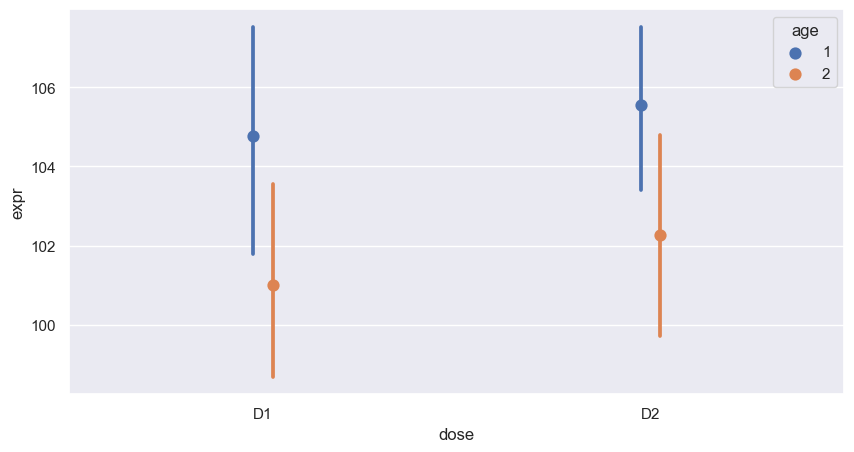

In [376]:
"""Визуализация seaborn"""
import seaborn as sns

sns.pointplot(x = atherosclerosis_data.dose, y = atherosclerosis_data.expr,
              hue = atherosclerosis_data.age, data = atherosclerosis_data,
              dodge = True, linestyles=['', ''])

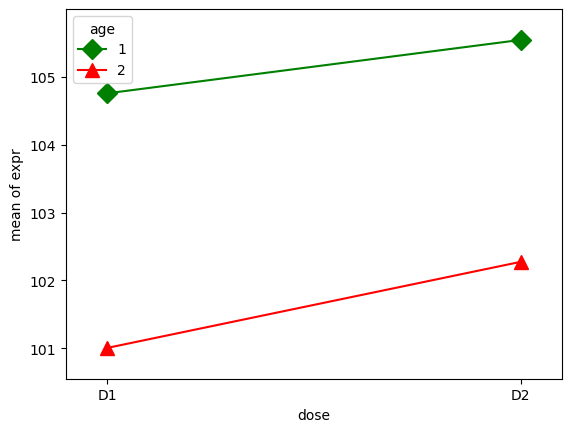

In [342]:
"""Визуализация statsmodels"""
from statsmodels.graphics.factorplots import interaction_plot
fig=interaction_plot(atherosclerosis_data.dose, atherosclerosis_data.age,
                     atherosclerosis_data.expr, colors=['green','red'], markers=['D','^'], ms=10)

Предположим, мы хотим выяснить, есть ли значимые различия в успешности прохождения онлайн-курса по введению в статистику (итоговый балл) у представителей разных факультетов (биологи, математики, психологи) с учетом курса обучения (1,3,5 курсы).   
В таком случае желательно чтобы:  
*Итоговый балл — зависимая переменная, факультет и курс — независимые переменные*  

Для проверки нулевой гипотезы о равенстве среднего итогового балла во всех группах осмысленнее всего применять:  
*Двуфакторный дисперсионный анализ*  


In [361]:
"""Исследования, в которых экспериментаторов интересовал вопрос о влиянии инъекции гормона на концентрацию кальция
   в крови у птиц с учетом их пола."""

import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

URL = 'https://stepik.org/media/attachments/lesson/9250/birds.csv'
birds_data = pd.read_csv(URL)
birds_data.head()

,var4,hormone,sex
0,17.859039,1,1
1,20.842343,1,1
2,19.318099,1,1
3,20.064451,1,1
4,17.620316,1,1


In [362]:
formula = 'var4 ~ C(hormone) + C(sex) + C(hormone):C(sex)'
model = ols(formula, birds_data).fit()
aov_table = anova_lm(model, typ=2)
aov_table

# ни фактор инъекции(hormone), ни фактор пола(sex) не оказали значимого влияния на переменную(var4)
# но взаимодействие факторов C(hormone):C(sex), оказало значимое влияние (p = 0.003682 < 0.05)

,sum_sq,df,F,PR(>F)
C(hormone),0.847472,1.0,0.086528,0.769653
C(sex),0.119762,1.0,0.012228,0.912318
C(hormone):C(sex),89.483384,1.0,9.136390,0.003682
Residual,587.650394,60.0,NaN,NaN


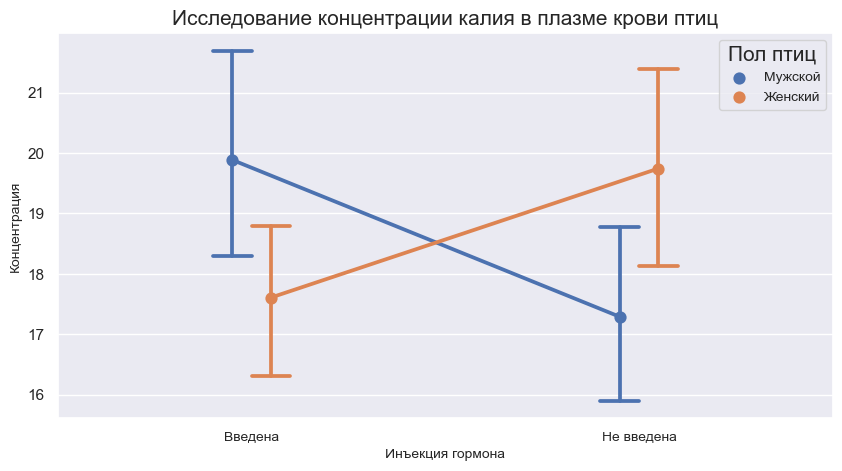

In [375]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# размеры и тип графика
sns.set(rc={'figure.figsize':(10, 5)})
pplot = sns.pointplot(x='hormone', y='var4', hue='sex', dodge=0.1, capsize=.1, data=birds_data)

# заголовки графика и осей
plt.title('Исследование концентрации калия в плазме крови птиц', fontsize=15)
plt.xlabel('Инъекция гормона', fontsize=10)
plt.ylabel('Концентрация', fontsize=10)

# название отложенных по оси x значений
bars = ('Введена', 'Не введена')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars, fontsize=10)

# легенда
leg_handles = pplot.get_legend_handles_labels()[0]
pplot.legend(leg_handles, ['Мужской', 'Женский'], title='Пол птиц', title_fontsize=15, fontsize=10)

# в случае мужского пола введение гормонов привело к увеличению var4
# в случае женского, к уменьшению

In [ ]:
"""Проверка на нормальность распределения данных с помощью scipy и pylab"""
from scipy.stats import shapiro, probplot
import pylab

x1 = birds_data[(birds_data["sex"] == 0) & (birds_data["hormone"] == 0)]["var4"].values
x2 = birds_data[(birds_data["sex"] == 0) & (birds_data["hormone"] == 1)]["var4"].values
x3 = birds_data[(birds_data["sex"] == 1) & (birds_data["hormone"] == 0)]["var4"].values
x4 = birds_data[(birds_data["sex"] == 1) & (birds_data["hormone"] == 1)]["var4"].values
for i in [x1, x2, x3, x4]:
    probplot(i, dist="norm", plot=pylab)
    plt.show()
    print(shapiro(i))

Компания, разрабатывающая мобильные телефоны, перед выпуском двух новых моделей (№1 и №2), решила выяснить, как потенциальные пользователи воспринимают эти новинки . Для этого компания набрала фокус-группу (100 мужчин, 100 женщин) и попросила участников оценить дизайн новых моделей телефонов от 1 до 100. Чтобы проанализировать полученные результаты, был применен двуфакторный дисперсионный анализ (зависимая переменная - оценка испытуемых по 100-балльной шкале, независимые переменные (факторы) - номер модели и пол испытуемых).  
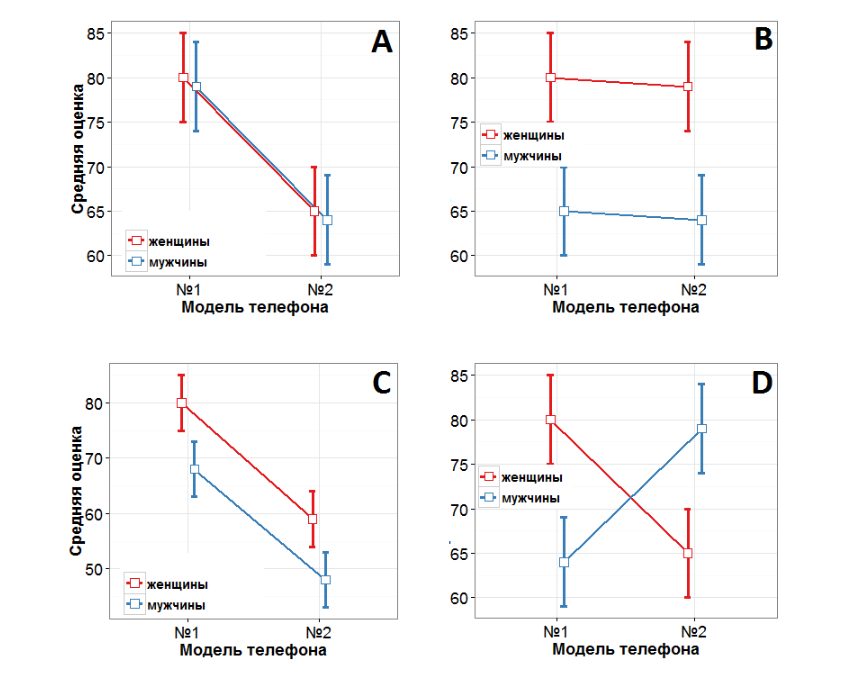

**A**: значимый эффект только для фактора модели телефона;  
**B**: значимый эффект только для фактора пола участников исследования;  
**C**: значимый эффект для обоих факторов;  
**D**: значимое взаимодействие факторов.

## 2.7 АБ тесты и статистика<a id='2.7'></a>